# Q6

Import some prerequisites:

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Run this cell for plotting.

In [38]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Here is for your helper functions(optional).

Implement this function to get the input image and return the skeleton of the input image.

In [1]:
def dilate(img, kernel): 
    '''
    Dialates image with given kernel.

    Parameters:
        img (np.ndarray): The image to dialate.
        kernel (np.ndarray): The kernel to dialate image with.

    Returns:
        np.ndarray: The dialated image.
    '''
    
    img_dialated = np.zeros(img.shape, dtype=np.uint8)

    #Write your code here
    
    # rotate kernel(structuring element) 180 degree
    kernel = np.rot90(kernel, 2)
    # get kernel size
    kernel_rows, kernel_cols = kernel.shape
    # get image size
    img_rows, img_cols = img.shape
    # padding size
    pad_rows = kernel_rows // 2
    pad_cols = kernel_cols // 2
    # padding image with reflect101
    img_padded = cv2.copyMakeBorder(img, pad_rows, pad_rows, pad_cols, pad_cols, cv2.BORDER_REFLECT101)
    
    # dialate image
    for row in range(img_rows):
        for col in range(img_cols):
            img_dialated[row, col] = np.max(img_padded[row:row+kernel_rows, col:col+kernel_cols] * kernel) # according to tthe formula in the slides

    # conv=cv2.filter2D(img,-1,kernel,borderType=cv2.BORDER_REPLICATE)
    # di = (conv>0).astype(np.uint8)

    return img_dialated

Test implementation

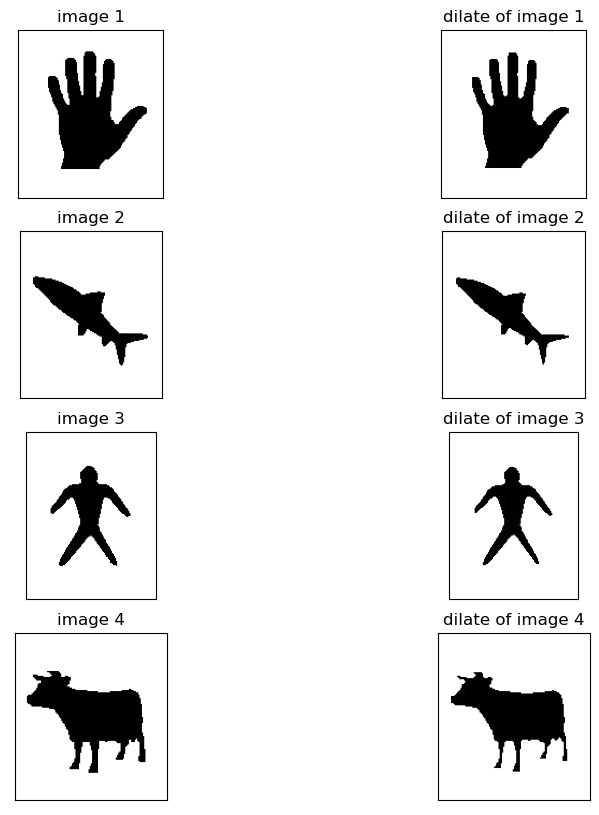

In [59]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_dilate = dilate(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_dilate, 'dilate of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_dilate= dilate(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_dilate, 'dilate of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_dilate = dilate(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_dilate, 'dilate of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_dilate = dilate(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_dilate, 'dilate of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-dilate')

In [41]:
def erode(img, kernel): 
    '''
    Erodes image with given kernel.

    Parameters:
        img (np.ndarray): The image to erode.
        kernel (np.ndarray): The kernel to erode image with.

    Returns:
        np.ndarray: The eroded image.
    '''
    img_eroded = np.zeros(img.shape, dtype=np.uint8)
    
    #Write your code here

    # get kernel size
    kernel_rows, kernel_cols = kernel.shape
    # get image size
    img_rows, img_cols = img.shape
    # padding size
    pad_rows = kernel_rows // 2
    pad_cols = kernel_cols // 2
    # padding image with reflect101
    img_padded = cv2.copyMakeBorder(img, pad_rows, pad_rows, pad_cols, pad_cols, cv2.BORDER_REFLECT101)
    # erode image
    for row in range(img_rows):
        for col in range(img_cols):
            # get min value after removing zeros in kernel
            img_eroded[row, col] = np.min(img_padded[row:row+kernel_rows, col:col+kernel_cols][kernel != 0])

    # conv=cv2.filter2D(img,-1,kernel,borderType=cv2.BORDER_REPLICATE)
    # n=np.sum(kernel)
    # er = (conv>= n).astype(np.uint8)

    return img_eroded

Test your implementation

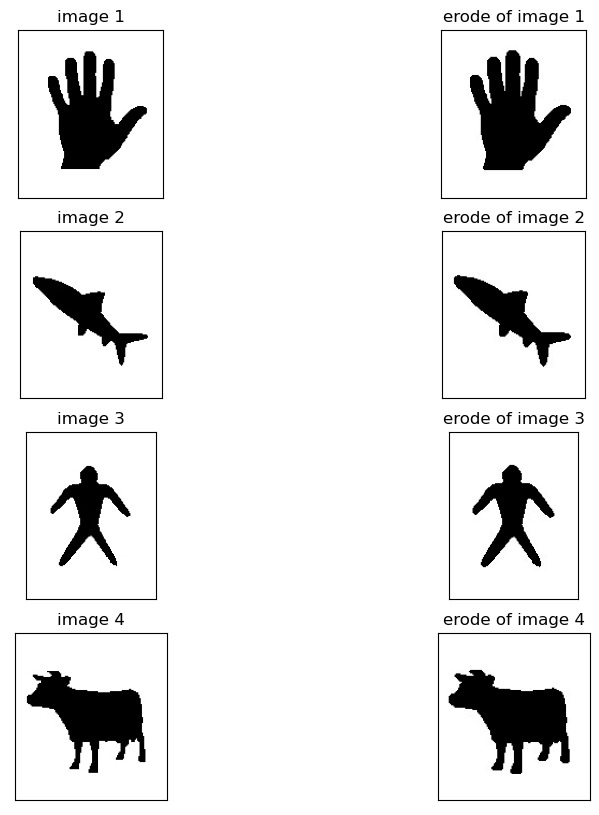

In [42]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_erode = erode(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_erode, 'erode of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_erode= erode(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_erode, 'erode of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_erode = erode(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_erode, 'erode of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_erode = erode(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_erode, 'erode of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-erode')

In [43]:
def open_morphology(img, kernel): 
    '''
    Performs opening morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform opening morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''

    #Write your code here
    img_eroded = erode(img, kernel) # as mentioned in the slides
    img_opened = dilate(img_eroded, kernel)
    
    return img_opened

Test your implementatino

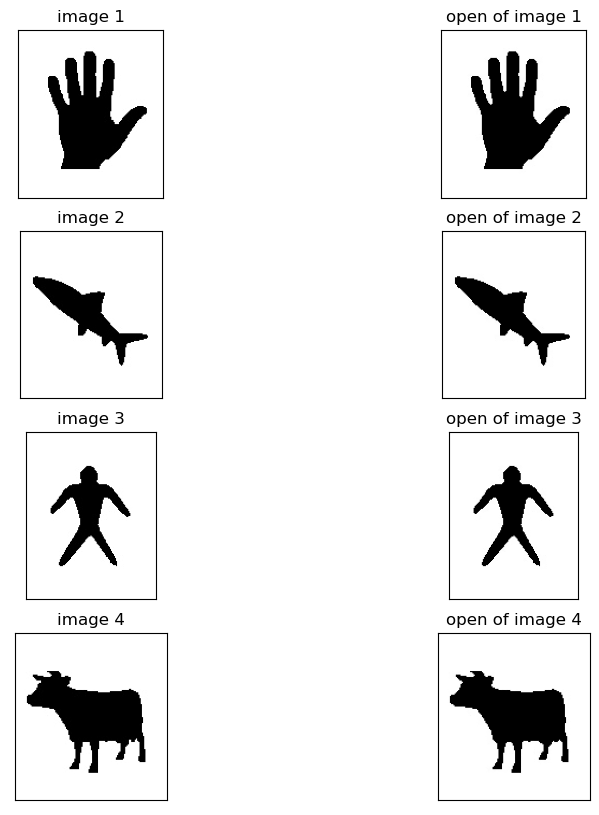

In [44]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_open = open_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_open, 'open of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_open= open_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_open, 'open of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_open = open_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_open, 'open of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_open = open_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_open, 'open of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-open')

In [45]:
def close_morphology(img, kernel): 
    '''
    Performs closing morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform closing morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''

    #Write your code here
    img_dilated = dilate(img, kernel) # as mentioned in the slides
    img_closed = erode(img_dilated, kernel)
    
    return img_closed

Test your implemention

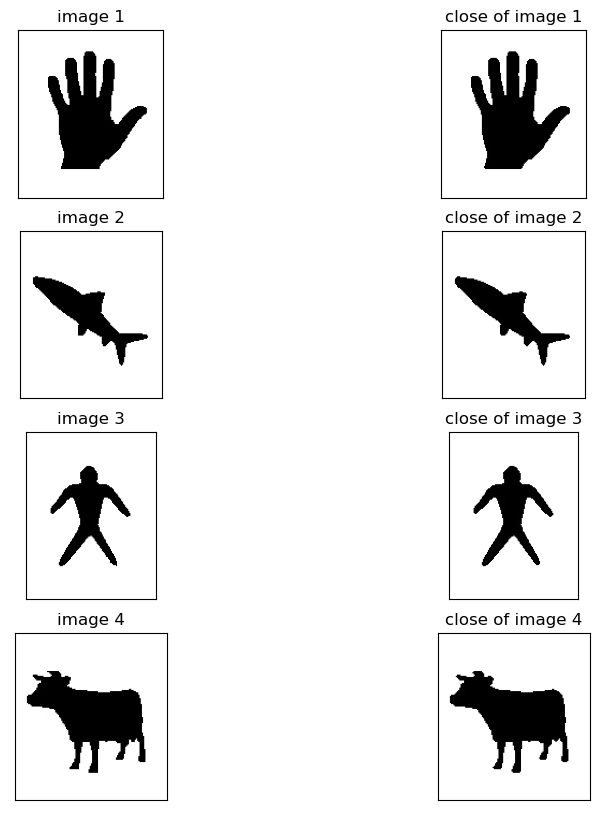

In [46]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_close = close_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_close, 'close of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_close= close_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_close, 'close of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_close = close_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_close, 'close of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_close = close_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_close, 'close of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-close')

# Part 2

In [47]:
#Write your code here
#Like last part, you should make output of each operation separately. Name output image files like this format: Q6-b-dilate, Q6-b-erode

<div dir="rtl">
    <p>
    از لینک زیر برای پیاده سازی استفاده کردیم.
    </p>
    <p>
    https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html
    </p>
</div>

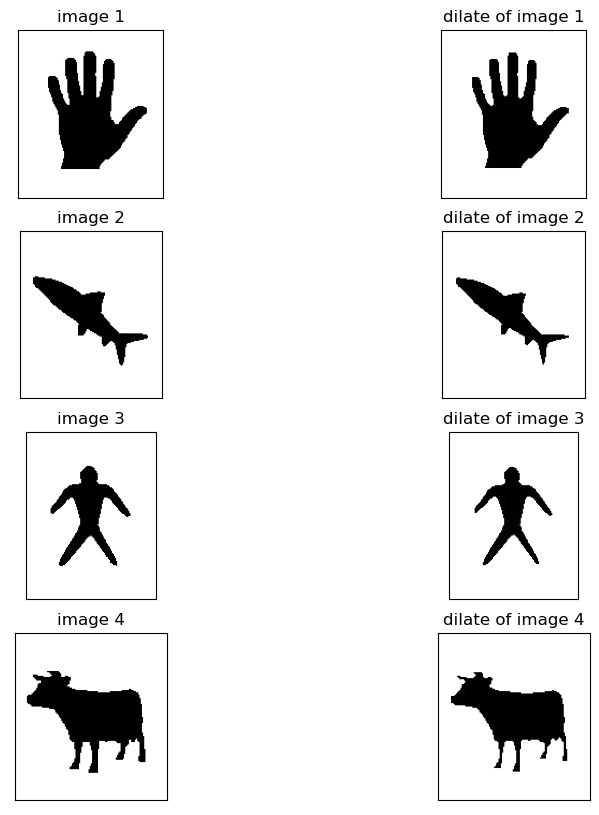

In [48]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_dilate = cv2.dilate(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8),iterations = 1)
image_list.append([image1_dilate, 'dilate of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_dilate = cv2.dilate(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8),iterations = 1)
image_list.append([image2_dilate, 'dilate of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_dilate = cv2.dilate(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8),iterations = 1)
image_list.append([image3_dilate, 'dilate of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_dilate = cv2.dilate(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8),iterations = 1)
image_list.append([image4_dilate, 'dilate of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-dilate')

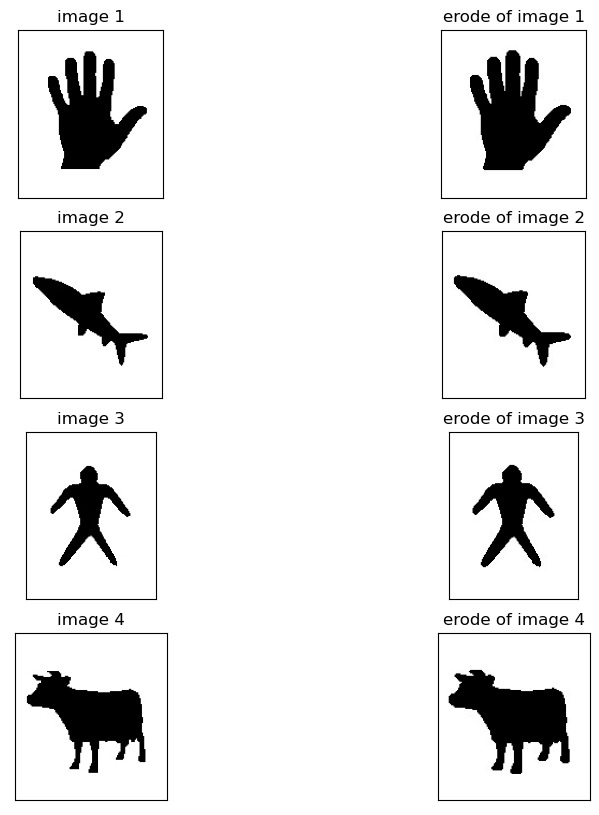

In [49]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_erode = cv2.erode(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8),iterations = 1)
image_list.append([image1_erode, 'erode of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_erode = cv2.erode(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8),iterations = 1)
image_list.append([image2_erode, 'erode of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_erode = cv2.erode(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8),iterations = 1)
image_list.append([image3_erode, 'erode of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_erode = cv2.erode(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8),iterations = 1)
image_list.append([image4_erode, 'erode of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-erode')

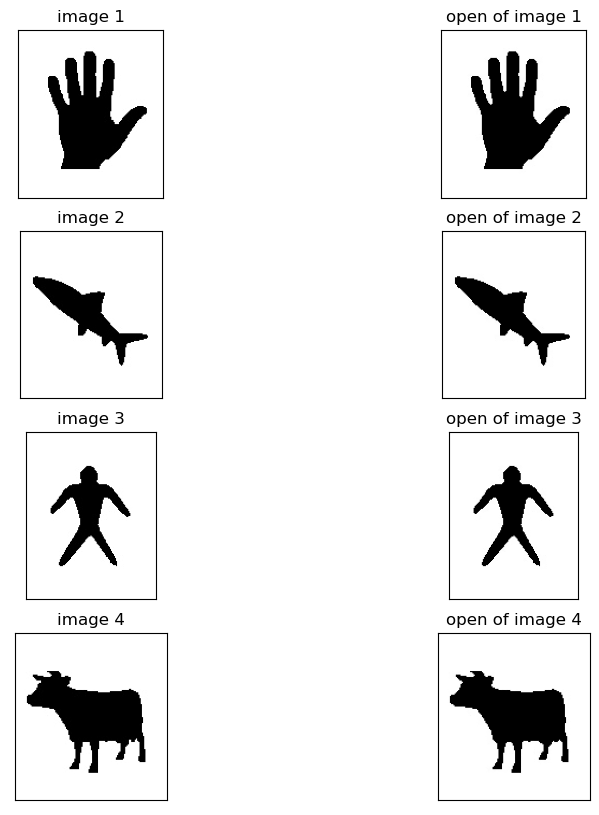

In [50]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_open = cv2.morphologyEx(image1, cv2.MORPH_OPEN, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image1_open, 'open of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_open = cv2.morphologyEx(image2, cv2.MORPH_OPEN, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image2_open, 'open of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_open = cv2.morphologyEx(image3, cv2.MORPH_OPEN, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image3_open, 'open of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_open = cv2.morphologyEx(image4, cv2.MORPH_OPEN, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image4_open, 'open of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-open')

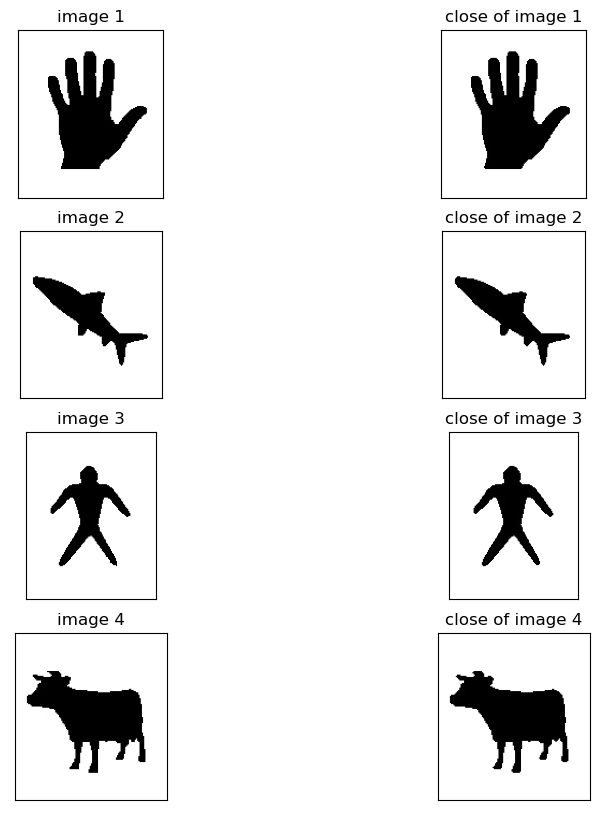

In [51]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_close = cv2.morphologyEx(image1, cv2.MORPH_CLOSE, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image1_close, 'close of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_close = cv2.morphologyEx(image2, cv2.MORPH_CLOSE, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image2_close, 'close of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_close = cv2.morphologyEx(image3, cv2.MORPH_CLOSE, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image3_close, 'close of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_close = cv2.morphologyEx(image4, cv2.MORPH_CLOSE, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image4_close, 'close of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-close')

# Part 3: optional
Skeleton of image

In [60]:
def get_skeleton(image, B):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
    """
    
    res = image.copy()
    
    # #Write your code here

    # invert the image so that the object is white
    image = cv2.bitwise_not(image)

    #Threshold the image with threshold value 127
    _, img = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Step 1: Create an empty skeleton
    skeleton = np.zeros(img.shape, np.uint8)

    # Get a Cross Shaped Kernel
    structuring_element = B # B = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
    # element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

    # Repeat steps 2-4
    while True:
        #Step 2: Open the image
        open = open_morphology(img, structuring_element)
        # open = cv2.morphologyEx(img, cv2.MORPH_OPEN, structuring_element)

        #Step 3: Substract open from the original image
        temp = cv2.subtract(img, open)
        
        #Step 4: Erode the original image and refine the skeleton
        eroded = erode(img, structuring_element)
        # eroded = cv2.erode(img, structuring_element)
        skeleton = cv2.bitwise_or(skeleton, temp)
        img = eroded.copy()

        # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
        if cv2.countNonZero(img) == 0:
            break
    
    res = skeleton

    return res

Test your implementation (don't change this cell).

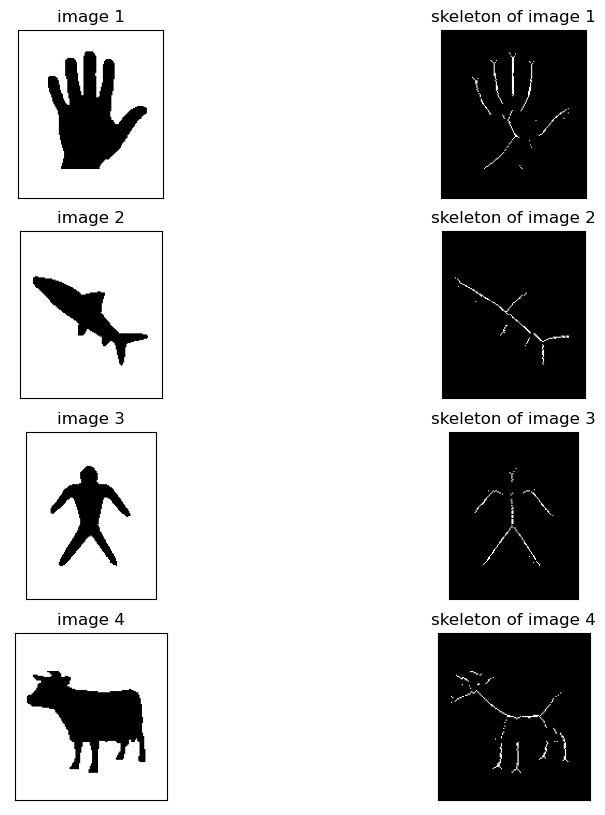

In [61]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton = get_skeleton(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton= get_skeleton(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton = get_skeleton(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton = get_skeleton(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-c')

End!!!